In [32]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

##### Loading and Exploring data.

In [33]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [34]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [35]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

print(X_train.head())
print(y_train.head())

    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0 -0.214284     0.655977    -0.509958   1.047282      0.897565    0.616600   
1 -0.066743    -0.060082     2.189602   0.155386     -0.395237    1.239286   
2  0.144945     0.655977    -0.509958   0.981216      0.849683    0.112957   
3 -0.073158     0.655977    -0.509958  -1.859640     -0.682526   -0.505151   
4  0.531116     1.372037    -0.509958   0.948183      0.753920    0.499846   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...    NWAmes   OLDTown  \
0  -0.934143    -0.455495 -0.796338  1.217379  ... -0.217157 -0.299192   
1  -0.629476     0.511365  0.285393 -0.786051  ... -0.217157 -0.299192   
2  -0.288430    -0.303083 -0.625819  1.245531  ... -0.217157 -0.299192   
3  -0.047424    -0.693637 -0.516580  0.987477  ... -0.217157 -0.299192   
4  -0.161106     0.232738 -0.026338  1.684221  ... -0.217157 -0.299192   

      SWISU    Sawyer   SawyerW   Somerst   StoneBr    Timber    Veenker  \
0 -0.12952

###### Develop model - Linear Regression

In [36]:
# Importing models
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0135714
LotArea,0.0675036
OverallQual,0.214606
OverallCond,0.0954381
YearBuilt,0.16072
YearRemodAdd,0.0253491
BsmtFinSF1,0.0901037
BsmtUnfSF,-0.0324273
TotalBsmtSF,0.137416


######  Develop model - Ridge Regression

In [39]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [40]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11430912602818613
0.1143883189069962
0.11452201329565971
0.11469744977061362
0.1149055753248758
0.11553053137615599
0.11625996465875431
0.11972299505022366
0.1277372905719841


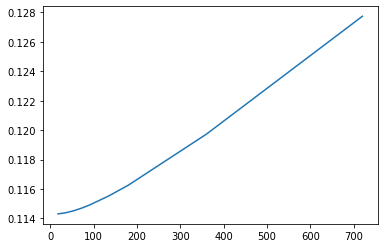

In [41]:
plt.plot(alphas, mses)

######  Develop model - Lasso

In [42]:
# Import Lasso
from sklearn.linear_model import Lasso

In [43]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0129255
LotArea,0.0442383
OverallQual,0.300162
OverallCond,0
YearBuilt,0.0542006
YearRemodAdd,0.0647997
BsmtFinSF1,0.114129
BsmtUnfSF,-0
TotalBsmtSF,0.105414


######  Develop model - Lasso with different levels of alpha and its mse (Hyperparameter tuning)

In [45]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11386863624693959
0.11411666655734329
0.11526461827765332
0.11732406234518182
0.12020611819731855
0.12921610751419008
0.13745407671806387


##### Develop model - Visualization

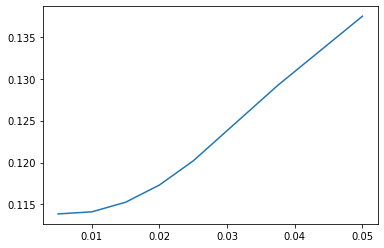

In [46]:
plt.plot(alphas, mses)

##### Develop model - Neural Networks (using default values)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [48]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

mlp = MLPRegressor(max_iter = 300)

y_train_1darray = y_train.values.flatten()
y_val_1darray = y_val.values.flatten()

mlp.fit(X_train,y_train_1darray.astype(int))

predictions = mlp.predict(X_val)

print("MSE using MLPRegressor")
print(mse(y_val_1darray,predictions))

print("Score using MLPRegressor")
print(mlp.score(X_val, y_val))

MSE using MLPRegressor
0.3681220503055792
Score using MLPRegressor
0.663828070491091


C:\Users\balaji.a01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [49]:
len(mlp.coefs_)

len(mlp.coefs_[0])

len(mlp.intercepts_[0])

100

##### Develop model - Neural Networks (Hyper parameter tuning)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor

mlpr = MLPRegressor(max_iter=7000)

param_list = {"hidden_layer_sizes": [5,10,50,5000],"max_iter":[5000,10000], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005,0.005]}

gridCV = GridSearchCV(estimator=mlpr, param_grid=param_list)

In [57]:
print("Starting Hyperparameter tuning using GridSearchCV to find the best params")
grid_result = gridCV.fit(X_train,y_train_1darray.astype(int))
best_params = grid_result.best_params_

best_MLPRegressor = MLPRegressor(hidden_layer_sizes=best_params["hidden_layer_sizes"], max_iter=best_params["max_iter"], 
                                 activation=best_params["activation"],solver=best_params["solver"],
                                 alpha=best_params["alpha"])

best_MLPRegressor = MLPRegressor(hidden_layer_sizes=1000, max_iter=3000,activation="tanh",solver="sgd",alpha=0.005)
#best_MLPRegressor = MLPRegressor(hidden_layer_sizes=1000, max_iter=3000,activation="relu",solver="adam",alpha=0.00005)
#best_MLPRegressor = MLPRegressor(hidden_layer_sizes=1000, max_iter=3000,activation="identity",solver="adam",alpha=0.00005)

print("Starting Fit")
best_MLPRegressor.fit(X_train,y_train_1darray.astype(int))

print("Starting Prediction")
predictions = best_MLPRegressor.predict(X_val)

print("MSE after using Hyperparameter tuning")
print(mse(y_val_1darray,predictions))
                                 

Starting Hyperparameter tuning using GridSearchCV to find the best params


C:\Users\balaji.a01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Starting Fit
Starting Prediction
MSE after using Hyperparameter tuning
0.29461111282762836


In [54]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)

print("Starting to fit using RandomForestRegressor....")
regr.fit(X_train,y_train_1darray.astype(int))
predictions_random_forest_regr = regr.predict(X_val)

print("MSE after using RandomForestRegressor")
print(mse(y_val_1darray,predictions_random_forest_regr))

Starting to fit using RandomForestRegressor....
MSE after using RandomForestRegressor
0.47483807893225255


C:\Users\balaji.a01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
from sklearn.svm import SVR

regr_SVR = SVR(C=1.0, epsilon=0.2)

print("Starting to fit using RandomForestRegressor....")
regr_SVR.fit(X_train,y_train_1darray.astype(int))
predictions_SVR = regr_SVR.predict(X_val)

print("MSE after using RandomForestRegressor")
print(mse(y_val_1darray,predictions_SVR))

Starting to fit using RandomForestRegressor....
MSE after using RandomForestRegressor
0.33655972704765824


In [56]:
from sklearn.ensemble import AdaBoostRegressor

regr_AdaBoost = AdaBoostRegressor(random_state=0, n_estimators=100)

print("Starting to fit using RandomForestRegressor....")
regr_AdaBoost.fit(X_train,y_train_1darray.astype(int))
predictions_AdaBoost = regr_AdaBoost.predict(X_val)

print("MSE after using RandomForestRegressor")
print(mse(y_val_1darray,predictions_AdaBoost))

Starting to fit using RandomForestRegressor....
MSE after using RandomForestRegressor
0.22631610581209766
